### 텍스트 데이터 다루기
+ 주로 글자가 연결된 문자열로 표현

    > 수치형 특성과 매우 다르므로 알고리즘 적용 전에 전처리를 해야된다.

#### 문자열 데이터 타입
문자열 데이터의 종류 : 범주형, 범주에 의미를 연결시킬 수 있는 임의의 문자열, 구조화된 문자열, 텍스트

+ 범주형 데이터 :

    > 고정된 목록으로 구성. category.

+ 범주에 의미를 연결시킬 수 있는 임의의 문자열

    > 고정된 목록이 아닌 매핑이나 임의 해석이 필요한 문자열.

    > ex) 공룡 엉덩이색

+ 구조화된 문자열

    > 미리 정의된 범주에 속하지는 않지만 일정한 구조를 가지는 문자열.

    > 분석하기 매우 어렵고 처리 방법이 분야에 따라 매우 다르다.

    > ex) 이름, 날짜, 전화번호, 식별번호

+ 텍스트 데이터
    > 트윗, 채팅, 리뷰, 작품, 문서, 전자책 등등. 단어로 구성된 문장에 정보를 담고있다.

    > 데이터셋 : 말뭉치, 하나의 텍스트를 의미하는 각 데이터 포인트 : 문서

#### 예제 애플리케이션: 영화 리뷰 감성 분석
+ 리뷰 데이터셋 : http://ai.stanford.edu/~amaas/data/sentiment/

    > 리뷰 텍스트와 양성(긍정적)/음성(부정적)의 레이블을 포함.

    > 7점 이상은 양성, 4점 이하는 음성으로 분류. 중간은 포함하지 않는다. = 이진 분류

    > 텍스트의 문자열 표현을 머신러닝 알고리즘에 적용할 수 있도록 수치 표현으로 바꿔야 함.

In [5]:
import mglearn, numpy as np, pandas as pd, matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import load_files
reviews_train = load_files('C:\\Users\\rjsgh\\OneDrive\\바탕 화면\\codes\\python\\ml\\train')
text_train, y_train = reviews_train.data, reviews_train.target
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]
    # HTML 줄바꿈 태그(<br />) 삭제.

reviews_test = load_files('C:\\Users\\rjsgh\\OneDrive\\바탕 화면\\codes\\python\\ml\\test')
text_test, y_test = reviews_test.data, reviews_test.target
text_test = [doc.replace(b"<br />", b" ") for doc in text_test]

#### 텍스트 데이터를 BOW로 표현하기
+ BOW

    > 장, 문단, 문장, 서식 같은 입력 텍스트의 구조 대부분을 잃고, 각 단어가 이 말뭉치에 있는 텍스트에 얼마나 많이 나타나는지만 확인

    > 단어의 출현 횟수만 세기에 텍스트를 담는 '가방'으로 생각할 수 있다.

    > BOW 표현 계산 3단계
    
    1. tokenization(토큰화) : 각 문서를 문서에 포함된 단어(토큰)로 나눈다. - 공백이나 구두점 등을 기준으로

    2. 어휘 사전 구축 : 모든 문서에 나타난 모든 단어의 어휘를 모으고 번호를 매긴다.(알파벳 순서)

    3. 인코딩 : 어휘 사전의 단어가 문서마다 몇 번 이나 나타나는지를 확인한다.

##### 샘플 데이터에 BOW 적용
+ CountVectorizer에 변환기 인터페이스로 구현되어있다.

In [4]:
bards_words = ['The fool doth think he is wise,','but the wise man knows himself to be a fool']

from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(bards_words) # 훈련 데이터를 토큰으로 나누고, 어휘 사전을 구축하여 vocabulary_에 저장.

print('voca size:', len(vect.vocabulary_))
print('voca :\n', vect.vocabulary_) # be에서 wise까지 13개 단어로 구성.

bag_of_words = vect.transform(bards_words) # BOW 표현 만들기
print('\nBOW:', repr(bag_of_words))
    # 0이 아닌 값만 저장하는 Scipy 희소행렬로 저장됨.
    # 각 행은 하나의 데이터 포인트(문서=여기서 문장)를 의미, 각 특성은 어휘 사전에 있는 각 단어를 의미.

print('\nBOW to array:\n', bag_of_words.toarray())
    # 희소 행렬 실제 내용 확인. 여기서는 특성이 13개라 가능하지만 실제 데이터는 아마 MemoryError가 발생할 확률 높음

voca size: 13
voca :
 {'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}

BOW: <2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>

BOW to array:
 [[0 0 1 1 1 0 1 0 0 1 1 0 1]
 [1 1 0 1 0 1 0 1 1 1 0 1 1]]


##### 영화 리뷰에 대한 BOW

In [5]:
# 특성 추출 및 확인
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)

feature_names = vect.get_feature_names_out()
    # 각 특성에 해당하는 단어를 리스트로 반환

print('feature num:',len(feature_names))
print('0~19:\n',feature_names[:20])
    # 숫자가 나왔다. 이런 숫자들은 대부분 그 자체로 의미가 있지 않음.
print('20010~20030:\n',feature_names[20010:20030])
    # 단수와 복수형의 의미가 비슷한 단어들 > 개별적 기록하는 것은 낭비

feature num: 74849
0~19:
 ['00' '000' '0000000000001' '00001' '00015' '000s' '001' '003830' '006'
 '007' '0079' '0080' '0083' '0093638' '00am' '00pm' '00s' '01' '01pm' '02']
20010~20030:
 ['dratted' 'draub' 'draught' 'draughts' 'draughtswoman' 'draw' 'drawback'
 'drawbacks' 'drawer' 'drawers' 'drawing' 'drawings' 'drawl' 'drawled'
 'drawling' 'drawn' 'draws' 'draza' 'dre' 'drea']


In [6]:
# 특성추출 개선 전 분류기 성능 수치 확인
    # 희소행렬의 고차원 데이터 > 선형 모델 성능 좋다
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

scores = cross_val_score(LogisticRegression(max_iter=1000),X_train, y_train, n_jobs=-1)
print('cross val score:', np.mean(scores))
    # 88% 도출. 그리드 서치까지 해보자

from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.001,0.01,0.1,1,10]}
grid = GridSearchCV(LogisticRegression(max_iter=5000),param_grid,n_jobs=-1)
grid.fit(X_train, y_train)
print('best val score:',grid.best_score_)
print('best val param:',grid.best_params_)

X_test = vect.transform(text_test)
print('test set score:', grid.score(X_test, y_test))
    # 테스트 점수(일반화) 88%

cross val score: 0.88124
best val score: 0.8881599999999998
best val param: {'C': 0.1}
test set score: 0.87892


In [7]:
# 단어(특성) 추출 방법 개선
    # CountVectorizer는 정규표현식을 사용해 토큰을 추출한다.
    # 모든 단어를 소문자로 바꾸므로 대소문자 차이는 없어진다.
    # min_df 매개변수로 토큰이 나타날 최소 문서 개수를 지정할 수 있다. = 의미 없는 특성 줄이기

vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
X_test = vect.transform(text_test)
print('X_trian limited by min_df:', repr(X_train))
    # 74000개 단어 > 27000개 정도로 줄어들었다.
    # 숫자 길이가 줄어들었고, 희귀한 단어와 철자가 틀린 단어들이 사라졌다.

grid = GridSearchCV(LogisticRegression(max_iter=5000),param_grid,n_jobs=-1)
grid.fit(X_train,y_train)
print('\nbest val score:',grid.score(X_test,y_test))
    # 모델 성능(88%)은 비슷하지만 처리 속도가 비교적 빨라졌다.

X_trian limited by min_df: <25000x27271 sparse matrix of type '<class 'numpy.int64'>'
	with 3354014 stored elements in Compressed Sparse Row format>

best val score: 0.8778


#### 불용어(stopword)
+ 너무 빈번하여 유용하지 않은 단어를 제외하는 것도 의미 없는 단어를 제거하는데 좋은 방법.

    > 언어별 불용어 목록을 사용 :  sklearn.feature_extraction.text  ex)  ENGLISH_STOP_WORDS 실전이나 다른 언어에 불용어 사용시 stop_word 매개변수에 불용어 목록을 입력.

    > 너무 자주 나타나는 단어를 제외

In [8]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print('num of stopword:', len(ENGLISH_STOP_WORDS))

vect = CountVectorizer(min_df=5, stop_words='english').fit(text_train)
X_train = vect.transform(text_train)

grid = GridSearchCV(LogisticRegression(max_iter=5000),param_grid, n_jobs=-1)
grid.fit(X_train, y_train)
print('best val score:',grid.best_score_)
    # 성능향상은 매우 미미하다. > 별 도움 안된다.
    # 고정된 불용어 목록은 모델이 데이터셋만 보고 불용어를 골라내기 어려운 작은 데이터셋에서나 도움이 된다.
    # max_df 옵션을 지정해 자주 나타나는 단어를 제거하고, 특성의 개수와 성능에 어떻게 영향을 주는지 연습.

num of stopword: 318
best val score: 0.8828400000000001


#### tf-idf로 데이터 스케일 변경하기
+ 중요하지 않아 보이는 특성을 제외하는 것 대신, 얼마나 의미 있는 특성인지 계산해 스케일을 조정하는 방식

    > 말뭉치의 다른 문서보다 특정 문서에 자주 나타나는 단어에 높은 가중치를 부여.

    > = 한 단어가 특정 문서에서는 자주 나타나고 다른 문서에서 그렇지 않다면, 그 단어는 특정 문서의 내용을 아주 잘 설명할 것이다.

    > TfidfTransformer는 CountVectorizer가 만든 희소 행렬을 입력 받아 변환후 L2 정규화.

    > TfidfVectorizer는 텍스트 데이터를 입력받아 BOW 특성 추출과 tf-idf 변환을 수행 후 L2 정규화.

        > 유클리디안 노름이 1이 되도록 각 문서 벡터의 스케일을 바꾼다. > 바뀐 벡터는 문서 길이(단어 수)에 영향을 받지 않는다.
    


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(TfidfVectorizer(min_df=5),LogisticRegression(max_iter=5000))
param_grid = {'logisticregression__C' : [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(pipe, param_grid, n_jobs=-1)
grid.fit(text_train, y_train)
print('best cross val score:',grid.best_score_)
    # 89%. tf-idf가 성능에 큰 영향을 주지 못했다. 비지도 학습이라 관심사인 레이블과 꼭 관계있는게 아닌것이 중요.

vectorizer = grid.best_estimator_.named_steps['tfidfvectorizer']

X_train = vectorizer.transform(text_train)
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()

feature_names = np.array(vectorizer.get_feature_names_out())
print('\nlowest tfidf feature:\n',feature_names[sorted_by_tfidf[:20]])
    # 낮은 tf-idf의 특성은 전체 문서에 걸쳐 매우 많이 나타나거나, 조금씩만 사용되거나, 매우 긴 문서에서만 사용됨.

print('\nhighest tfidf feature:\n',feature_names[sorted_by_tfidf[-20:]])
    # 특정 문서에서 자주 나타남

sorted_by_idf = np.argsort(vectorizer.idf_)
print('\nlowest idf feature:',feature_names[sorted_by_idf[:100]])
    # idf 값이 낮다 = 자주 나타나서 덜 중요하다고 생각되는 단어
    # 대부분 불용어. good, bad 등의 중요한 감정 표현도 자주 나타나기에 여기서는 덜 중요하다고 판단해버린다.

best cross val score: 0.8918800000000001

lowest tfidf feature:
 ['suplexes' 'gauche' 'hypocrites' 'oncoming' 'songwriting' 'galadriel'
 'emerald' 'mclaughlin' 'sylvain' 'oversee' 'cataclysmic' 'pressuring'
 'uphold' 'thieving' 'inconsiderate' 'ware' 'denim' 'reverting' 'booed'
 'spacious']

highest tfidf feature:
 ['gadget' 'sucks' 'zatoichi' 'demons' 'lennon' 'bye' 'dev' 'weller'
 'sasquatch' 'botched' 'xica' 'darkman' 'woo' 'casper' 'doodlebops'
 'smallville' 'wei' 'scanners' 'steve' 'pokemon']

lowest idf feature: ['the' 'and' 'of' 'to' 'this' 'is' 'it' 'in' 'that' 'but' 'for' 'with'
 'was' 'as' 'on' 'movie' 'not' 'have' 'one' 'be' 'film' 'are' 'you' 'all'
 'at' 'an' 'by' 'so' 'from' 'like' 'who' 'they' 'there' 'if' 'his' 'out'
 'just' 'about' 'he' 'or' 'has' 'what' 'some' 'good' 'can' 'more' 'when'
 'time' 'up' 'very' 'even' 'only' 'no' 'would' 'my' 'see' 'really' 'story'
 'which' 'well' 'had' 'me' 'than' 'much' 'their' 'get' 'were' 'other'
 'been' 'do' 'most' 'don' 'her' 'also' '

#### 모델 계수 조사

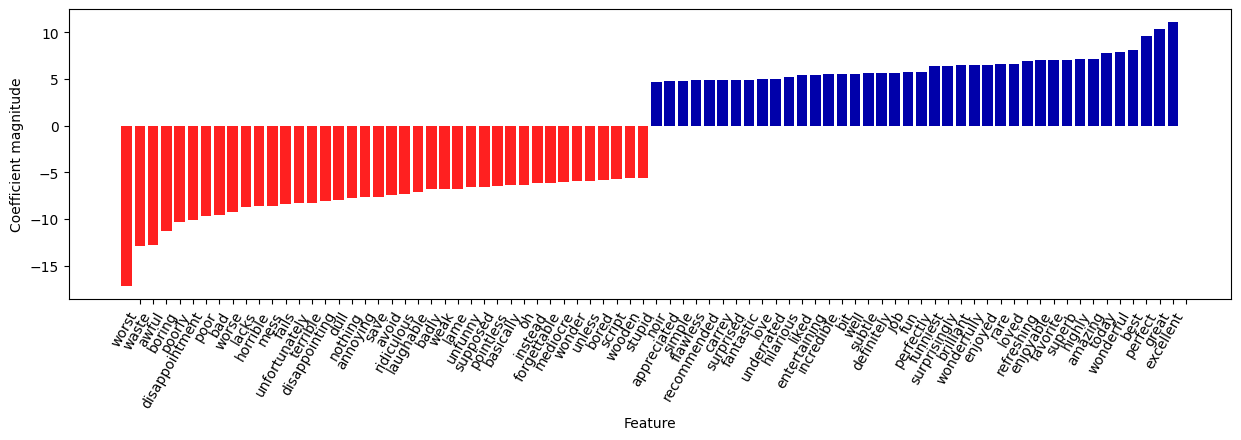

In [10]:
mglearn.tools.visualize_coefficients(grid.best_estimator_.named_steps['logisticregression'].coef_[0],
                                     feature_names, n_top_features=40)
    # 가장 큰 계수 40개와  가장 작은 계수 40개를 보여준다.

#### 여러 단어로 만든 BOW(n-그램)
+ BOW 방식은 단어의 순서가 완전히 무시된다는 단점이 있어 다음과 같은 문제가 발생할 수 있다.

    > it's bad, not good at all 과 it's good, not bad at all 이 완전히 동일하게 변환된다.

    > 토큰 하나의 횟수만 고려하지 않고 옆에 있는 두세 개의 토큰을 함께 고려하여 문맥을 고려할 필요가 있다.

+ n-gram : 연속 된 토큰. > 2개 = 바이그램, 3개 = 트라이그램

    > CountVectorizer와 TfidfVectorizer의 ngram_range = (min len, max len) 매개변수 사용

In [11]:
print('bards_words:\n', bards_words)

cv = CountVectorizer(ngram_range=(1,1)).fit(bards_words)
print('voca size:', len(cv.vocabulary_))
print('voca:', cv.get_feature_names_out())

cv = CountVectorizer(ngram_range=(2,2)).fit(bards_words)
print('\nvoca size:', len(cv.vocabulary_))
print('voca:', cv.get_feature_names_out())
    # 보통 단어 하나가 큰 의미를 갖는 경우가 많기에, 토큰의 최소 길이는 1이다. 많은 경우에 바이그램을 추가해주면 도움이 된다.
    # 특성의 개수는 바이그램이면 제곱, 트라이 그램이면 세 제곱이 된다. 5-그램 부터는 과대적합 때문에 거의 사용하지 않는다.

bards_words:
 ['The fool doth think he is wise,', 'but the wise man knows himself to be a fool']
voca size: 13
voca: ['be' 'but' 'doth' 'fool' 'he' 'himself' 'is' 'knows' 'man' 'the' 'think'
 'to' 'wise']

voca size: 14
voca: ['be fool' 'but the' 'doth think' 'fool doth' 'he is' 'himself to'
 'is wise' 'knows himself' 'man knows' 'the fool' 'the wise' 'think he'
 'to be' 'wise man']


In [12]:
#  n-gram 적용
pipe = make_pipeline(TfidfVectorizer(min_df=5),LogisticRegression(max_iter=5000))

param_grid = {'logisticregression__C' : [0.001, 0.01, 0.1, 1, 10],
              'tfidfvectorizer__ngram_range': [(1,1),(1,2),(1,3)]}

grid = GridSearchCV(pipe, param_grid, n_jobs=-1)
grid.fit(text_train, y_train)
print('best cross val score:', grid.best_score_)
print('best params:', grid.best_params_)

best cross val score: 0.90628
best params: {'logisticregression__C': 10, 'tfidfvectorizer__ngram_range': (1, 3)}


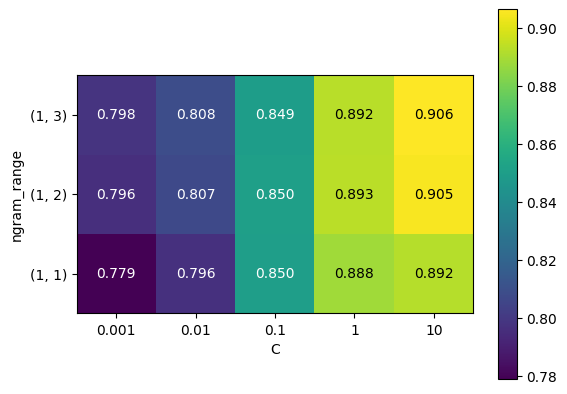

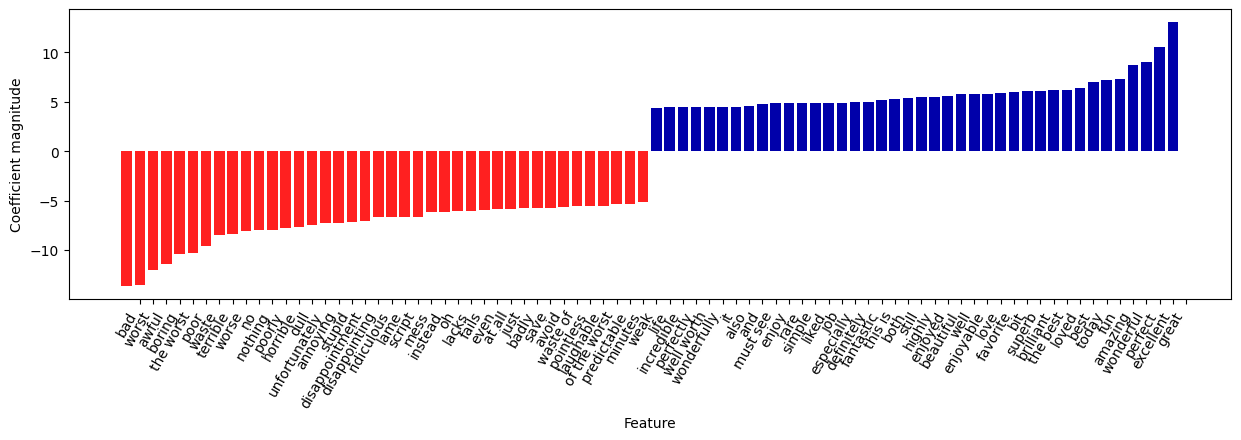

In [14]:
# grid search 결과
scores = grid.cv_results_['mean_test_score'].reshape(-1,3).T

heatmap = mglearn.tools.heatmap(
    scores, xlabel='C', ylabel='ngram_range', cmap='viridis', fmt='%.3f',
    xticklabels=param_grid['logisticregression__C'],
    yticklabels=param_grid['tfidfvectorizer__ngram_range'])
plt.colorbar(heatmap)

# 특성 이름과 계수 추출
vect = grid.best_estimator_.named_steps['tfidfvectorizer']
feature_names = np.array(vect.get_feature_names_out())
coef = grid.best_estimator_.named_steps['logisticregression'].coef_
mglearn.tools.visualize_coefficients(coef[0], feature_names, n_top_features=40)

#### 고급 토큰화, 어간 추출, 표제어 추출
+ 복수 단수형, 여러 동사형을 하나씩 전부 토큰으로 다루면 일반화 성능에 방해가 된다.

    > 어간 추출(stemming) : 일일이 어미를 찾아 제외하는 규칙 기반 방식.

    > 표제어 추출(lemmatization) : 알려진 단어의 형태 사전을 사용하고 문장에서 단어의 역할을 고려하는 처리 방식

In [3]:
import spacy
import nltk

en_nlp = spacy.load('en_core_web_sm')
stemmer = nltk.stem.PorterStemmer()

    # spacy 표제어 추출과  nltk 어간 추출 비교 함수
def compare_normalization(doc):
    doc_spacy = en_nlp(doc)
    print('표제어:\n', [token.lemma_ for token in doc_spacy])
    print('어간 :\n', [stemmer.stem(token.norm_.lower()) for token in doc_spacy])

compare_normalization(u"Our meeting today was worse than yesterday, "
                        "I'm scared of meeting the clients tomorrow")

표제어:
 ['our', 'meeting', 'today', 'be', 'bad', 'than', 'yesterday', ',', 'I', 'be', 'scared', 'of', 'meet', 'the', 'client', 'tomorrow']
어간 :
 ['our', 'meet', 'today', 'wa', 'wors', 'than', 'yesterday', ',', 'i', 'am', 'scare', 'of', 'meet', 'the', 'client', 'tomorrow']


In [7]:
# CountVectorizer에서 tokenizer 매개변수를 사용해 문서를 토큰화 하는 방법 지정
from sklearn.feature_extraction.text import CountVectorizer
    # 언어 모델 로드
en_nlp = spacy.load('en_core_web_sm', disable=['parser','ner'])

    # 자작 토큰 분할기
def custom_tokenizer(doc):
    doc_spacy = en_nlp(doc)
    return [token.lemma_ for token in doc_spacy]

lemma_vect = CountVectorizer(tokenizer=custom_tokenizer, min_df=5)
X_train_lemma = lemma_vect.fit_transform(text_train)
print('X_train_lemma.shape:', X_train_lemma.shape)

vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print('X_train.shape:', X_train.shape)

X_train_lemma.shape: (25000, 21925)
X_train.shape: (25000, 27271)


In [10]:
# 표제어의 효과 검증
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
cv = StratifiedShuffleSplit(n_splits=5, test_size=.99, train_size=.01, random_state=0)
grid = GridSearchCV(LogisticRegression(max_iter=5000), param_grid, cv = cv, n_jobs=-1)

grid.fit(X_train, y_train)
print('best cross val score:', '기본 :', grid.best_score_)

grid.fit(X_train_lemma,y_train)
print('best cross val score:','표제어 :',grid.best_score_)
    # 소폭의 성능 향상을 확인할 수 있다.

best cross val score: 기본 : 0.7187636363636363
best cross val score: 표제어 : 0.7169373737373738


#### 토픽 모델링과 문서 근집화
+ 토픽 모델링

    > 비지도 학습으로, 문서를 하나 또는 그 이상의 토픽으로 할당하는 작업

    > 한 문서가 하나의 토픽에 할당 = 문서를 군집 시키는 문제

    > 한 문서가 둘 이상의 토픽에 할당 = 분해  (LDA : 잠재 디리클레 할당)

##### LDA
함께 자주 나타나는 단어의 그룹(토픽)을 찾는 것. ML에서의 토픽은 PCA나 NMF로 추출한 성분에 가까운 것.

비지도 학습에서 분석의 결과가 왜곡되지 않으려면 자주 나타나는 단어를 제거하는 것이 좋다.

In [12]:
vect = CountVectorizer(max_features=10000, max_df=.15)
X= vect.fit_transform(text_train)

from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, learning_method='batch', max_iter=25, random_state=0, n_jobs=-1)
    # 한 눈에 보기 쉽게 10개의 토픽으로 모델을 학습. 토픽은 순서를 갖지 않으며, 토픽 수를 바꾸면 모든 토픽이 바뀐다.

document_topics = lda.fit_transform(X)
print('lda.components_.shape:', lda.components_.shape)
    # (n_topics, n_words)

    # 각 토픽이 의미하는 것이 무엇인지 알기 위해 가장 중요한 단어 확인
sorting = np.argsort(lda.components_, axis=1)[:,::-1]
feature_names = np.array(vect.get_feature_names_out())

mglearn.tools.print_topics(topics=range(10), feature_names=feature_names, sorting=sorting, topics_per_chunk=5, n_words=10)



lda.components_.shape: (10, 10000)
topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
between       war           funny         show          didn          
young         world         guy           series        saw           
family        us            comedy        episode       am            
real          american      worst         tv            thought       
beautiful     our           thing         episodes      watched       
both          documentary   re            shows         got           
us            history       stupid        season        book          
each          years         actually      new           now           
work          new           want          musical       10            
performance   human         nothing       years         read          


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------    